In [1]:
import numpy as np

import pandas as pd

from pandas import Series, DataFrame

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [2]:
problems_df = pd.read_csv('communicable.csv')

In [3]:
problems_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1195
Data columns (total 4 columns):
Year                                   1196 non-null object
District                               1196 non-null object
Communicable and infectious disease    1196 non-null object
Number of people                       1196 non-null int64
dtypes: int64(1), object(3)
memory usage: 46.7+ KB


In [4]:
year_df = problems_df.pivot_table(index='Year',columns='Communicable and infectious disease',aggfunc=sum)
year_df

Number of people                   \
Communicable and infectious disease Confirmed Meningitis HIV/AIDS Leprosy   
Year                                                                        
2009/010                                            1581     3864    2536   
2010/011                                            1552     2240    1572   
2011/012                                            1403     2151    1880   
2012/013                                            2801     3243    2304   

                                             
Communicable and infectious disease STD/STI  
Year                                         
2009/010                              50112  
2010/011                              42992  
2011/012                              41370  
2012/013                              45892

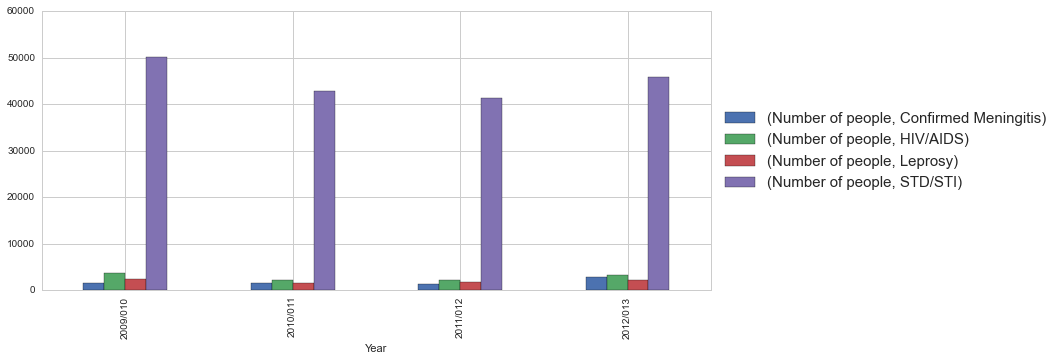

In [6]:
year_df.plot(figsize=(12,5),kind='bar').legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':15})

In [7]:
year_df.corr()

Number of people  \
Communicable and infectious disease                  Confirmed Meningitis   
                 Communicable and infectious disease                        
Number of people Confirmed Meningitis                            1.000000   
                 HIV/AIDS                                        0.371484   
                 Leprosy                                         0.394429   
                 STD/STI                                         0.227642   

                                                                          \
Communicable and infectious disease                   HIV/AIDS   Leprosy   
                 Communicable and infectious disease                       
Number of people Confirmed Meningitis                 0.371484  0.394429   
                 HIV/AIDS                             1.000000  0.939495   
                 Leprosy                              0.939495  1.000000   
                 STD/STI                              0.978907  0.864225   

                                                                
Communicable and infectious disease                    STD/STI  
                 Communicable and infectious disease            
Number of people Confirmed Meningitis                 0.227642  
                 HIV/AIDS                             0.978907  
                 Leprosy                              0.864225  
                 STD/STI                              1.000000

In [8]:
idx = problems_df.groupby(['Year','Communicable and infectious disease'], sort=False)['Number of people'].transform(max) == problems_df['Number of people']

In [9]:
problems_df[idx]

,Year,District,Communicable and infectious disease,Number of people
185,2009/010,Parbat,HIV/AIDS,1458
186,2009/010,Parbat,Leprosy,406
204,2009/010,Bardiya,STD/STI,5057
251,2009/010,Rukum,Confirmed Meningitis,210
310,2010/011,Jhapa,Leprosy,175
315,2010/011,Morang,Confirmed Meningitis,292
524,2010/011,Bardiya,STD/STI,4837
569,2010/011,Achham,HIV/AIDS,551
608,2012/013,Jhapa,STD/STI,3290
662,2012/013,Dhanusha,Leprosy,281


In [12]:
problems_df[problems_df.District=='Kaski']

,Year,District,Communicable and infectious disease,Number of people
156,2009/010,Kaski,STD/STI,428
157,2009/010,Kaski,HIV/AIDS,8
158,2009/010,Kaski,Leprosy,65
159,2009/010,Kaski,Confirmed Meningitis,34
452,2010/011,Kaski,STD/STI,426
453,2010/011,Kaski,HIV/AIDS,9
454,2010/011,Kaski,Leprosy,35
455,2010/011,Kaski,Confirmed Meningitis,195
752,2012/013,Kaski,STD/STI,1538
753,2012/013,Kaski,HIV/AIDS,140


In [13]:
idx = problems_df.groupby(['District','Communicable and infectious disease'], sort=False)['Number of people'].transform(max) == problems_df['Number of people']

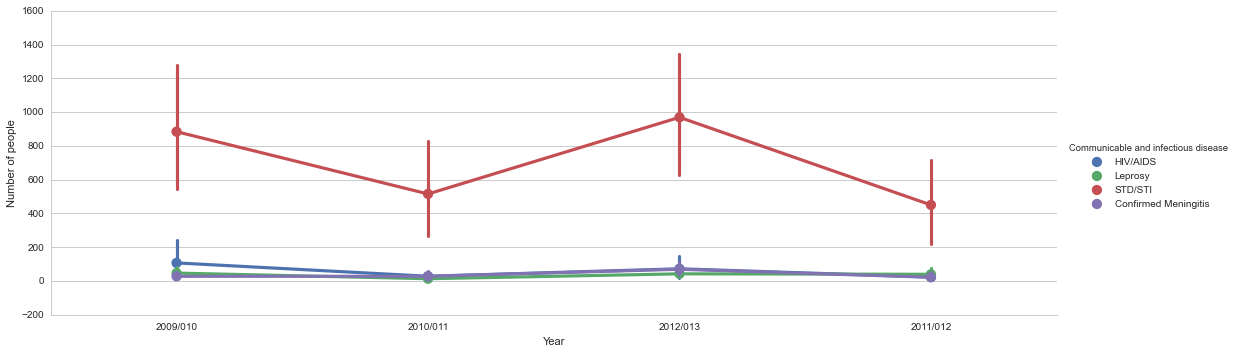

In [23]:
sns.factorplot('Year', 'Number of people', hue='Communicable and infectious disease',data=problems_df[idx], aspect=3, size=5)